### Part A: PCA

In [1]:
import numpy as np

In [2]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 1. Perform Exploratory Data Analysis (EDA) on X_train and discuss the data and what you observe prior to beginning modeling (visualize the images) 

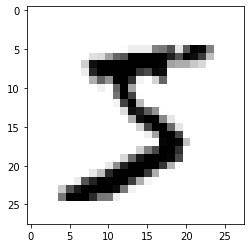

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],
           cmap=plt.cm.binary)
plt.show()

In [4]:
X_train_reshaped =[]
for x in X_train:
    X_train_reshaped.append(x.reshape(1,784)[0])
X_train = np.array(X_train_reshaped)

In [5]:
X_test_reshaped = []
for x in X_test:
    X_test_reshaped.append(x.reshape(1,784)[0])
X_test = np.array(X_test_reshaped)

In this data set, each data is 28*28 2 dimention image

##### 2. Normalize the image data so the pixel values are between 0 and 1.

In [6]:
X_train = X_train/255
X_test = X_test/255

##### 3. Use PCA to reduce the 784 dimensions of the data to 32 dimensions using X_train

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)
X_reduced = pca.fit_transform(X_train)

print('X shape:', X_train.shape)
print('X_reduced shape:', X_reduced.shape)

X shape: (60000, 784)
X_reduced shape: (60000, 32)


##### 4. Transform X_train, discuss the original variance in X_train and how much variance is explained by the 32 components. Plot the variance explained as a function of the number of components used and explain why the shape of the plot is what it is (use what we know about PCA) 

original varience:  52.72503549512755
variance explained by 32 components:  39.20506393222206


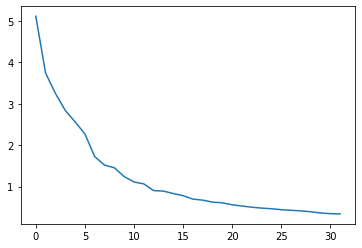

In [8]:
total_var = np.sum(np.var(X_train,axis=0))
print("original varience: ",np.sum(np.var(X_train,axis=0)))
print('variance explained by 32 components: ', np.sum(pca.explained_variance_))
plt.plot(pca.explained_variance_)

It means the top ranked components explain the most part of the varience of this data set, the explained variance geting less and less with the rank of the componant geting lower and lower.

##### 5. Using the transform fit on X_train, transform X_test and discuss the original variance in X_test and how much variance is explained on X_test by the 32 components. 

In [9]:
pca_test = PCA(n_components=32)
pca_test.fit(X_train)
test_reduced = pca.transform(X_test)

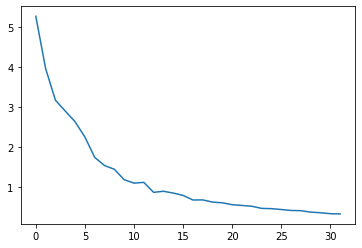

In [10]:
plt.plot(np.var(test_reduced,axis=0))

In [11]:
print("original test varience: ",np.sum(np.var(X_test,axis=0)))
print('variance explained by 32 components: ', np.sum(np.var(test_reduced,axis=0)))

original test varience:  52.84824867142073
variance explained by 32 components:  39.65644482082396


##### 6. Compare results from #4 and #5

In [12]:
import pandas as pd

In [13]:
a = [[np.sum(np.var(X_train,axis=0)),np.sum(pca.explained_variance_)],[np.sum(np.var(X_test,axis=0)),np.sum(np.var(test_reduced,axis=0))]]

In [14]:
compare = pd.DataFrame(a,columns=['train','test'], index = ['total_var','explained_var'])

In [15]:
compare

,train,test
total_var,52.725035,39.205064
explained_var,52.848249,39.656445


### Part B: AutoEncoder

##### 1. Start with data after step #2 from Section A

In [16]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


##### 2. Build an autoencoder (either at least 1 hidden layer or using CNN) that will reduce the 784 dimensions of the data to 32 dimensions

In [17]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

---

##### 3. Train an autoencoder on X_train. Discuss the original variance in X_train and how much variance is explained by the 32 dimensions. Hint: Use “model.predict(X_train)” to get predictions

configuration: 

In [18]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [19]:
autoencoder.fit(X_train, X_train,
                epochs=25,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/25
235/235 [==============================] - 3s 10ms/step - loss: 0.2807 - val_loss: 0.1929
Epoch 2/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1724 - val_loss: 0.1551
Epoch 3/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1452 - val_loss: 0.1343
Epoch 4/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1293 - val_loss: 0.1220
Epoch 5/25
235/235 [==============================] - 2s 8ms/step - loss: 0.1195 - val_loss: 0.1145
Epoch 6/25
235/235 [==============================] - 2s 7ms/step - loss: 0.1124 - val_loss: 0.1073
Epoch 7/25
235/235 [==============================] - 2s 7ms/step - loss: 0.1063 - val_loss: 0.1027
Epoch 8/25
235/235 [==============================] - 2s 9ms/step - loss: 0.1023 - val_loss: 0.0993
Epoch 9/25
235/235 [==============================] - 3s 14ms/step - loss: 0.0994 - val_loss: 0.0971
Epoch 10/25
235/235 [==============================] - 3s 13ms/step - loss: 0.0976 - val_loss: 0.0

In [20]:
prediction = autoencoder.predict(X_train)

In [21]:
explained_var_train = np.sum(np.var(prediction,axis = 0))

In [22]:
total_var_train = np.sum(np.var(X_train,axis = 0))

In [23]:
explained_train = explained_var_train/total_var_train

##### 4. Using the model trained on X_train, transform X_test and discuss the original variance in X_test and how much variance is explained on X_test by the 32 dimensions of the autoencoder. Hint: Use “model.predict(X_test)” to get predictions.

In [24]:
prediction = autoencoder.predict(X_test)

In [25]:
explained_var_test = np.sum(np.var(prediction,axis = 0))

In [26]:
total_var_test = np.sum(np.var(X_test, axis = 0))

In [27]:
explained_test = explained_var_test/total_var_test

##### 5. Compare results from #3 and #4 and why it is important to test out of sample

In [28]:
compare  = pd.DataFrame(index = ['train', 'test'])

In [29]:
compare['% variation_explained'] = [explained_train, explained_test]

In [30]:
compare

,% variation_explained
train,0.863104
test,0.869264


because we can test if our model is overfitted by testing out of sample

### Part C: Explain Results

autoencoder explains more variantion, because PCA only explain linear relation ship, autoencoder can also explain non_linear relationship.

PCA has 784 parameters;
autoencoder has 784x32x2+32+784 = 50992 parameters

we use PCA when the data set only has linear relationship, otherwise we use Autoencoder

### Part D: Extra Credit

In [56]:
import math
import numpy as np

In [57]:
def sigmoid(dt):
    return 1/(1+np.exp(-dt))

In [105]:
def relu(dt):
    return max(0,dt)

In [106]:
relu = np.vectorize(relu)

In [107]:
def none(df):
    return df

In [108]:
def drelu(x):
    return x>0

In [109]:
drelu= np.vectorize(drelu)

In [69]:
import time

In [124]:
class autoencoder:
    def __init__(self,data_dim, encoding_dim, a1, a2):
        self._a1 = a1
        self._a2 = a2
        self._ones = np.array([[1] for x in range(60000)])
        self._data_dim = data_dim
        self._m = 0 # data size
        self._encoding_dim = encoding_dim
        self._b1 = np.array([0. for x in range(encoding_dim)])
        self._b2 = np.array([0. for x in range(data_dim)])
        self._w1 = np.transpose([[(random.random()-0.5) for x in range(self._data_dim)] for y in range(self._encoding_dim)])
        self._w2 = np.transpose([[(random.random()-0.5) for x in range(self._encoding_dim)] for y in range(self._data_dim)])
        self._observed = np.array([])       
        self._z = np.array([])
        self._L = 0
        self._y = np.array([])
        self._ya = np.array([])
        self._z = np.array([])
        self._za = np.array([])
        self._dL_dza = np.array([])
        self._dza_dz = np.array([])
        self._dL_dz = np.array([])
        self._db2 = np.array([])
        self._dw2 = np.array([])
        self._dz_dya = np.array([])
        self._dL_dya = np.array([])
        self._dya_dy = np.array([])
        self._dL_dy = np.array([])
        self._db1 = np.array([])
        self._dy_dw1 = np.array([])
        self._dw1 = np.array([])

    def encoder(self):
        self._y = np.dot(self._observed,self._w1)+self._ones*self._b1 
        self._ya = self._a1(self._y)
    def decoder(self):
        self._z = np.dot(self._ya, self._w2)+self._ones*self._b2
        print("-", end='')
        self._za = self._a2(self._z)
    def forward(self):
        self.encoder()
        print('-', end='')
        self.decoder()
        print("-", end='')
    def loss(self):
        self._L = round(np.sum((self._observed-self._za)**2, axis=0)/(self._m),4)

###decoding part backpropagation###
    def dL_dza(self):
        self._dL_dza = 2*(self._za-self._observed)/self._m
    def dza_dz(self):
        if self._a2==none:
            self._dza_dz = 1
        if self._a2==sigmoid:
            self._dza_dz = self._za*(1-self._za)
    def dL_dz(self):
        self._dL_dz = self._dL_dza*self._dza_dz
    def db2(self):
        self._db2 = (np.sum(self._dL_dz,axis = 0).T)
    def dw2(self):
        self._dw2 = ((self._dL_dz.T).dot(self._ya).T)
        print("-", end='')
###encoding part backpropagation###
    def dz_dya(self):
        self._dz_dya = self._w2.T
    def dL_dya(self):
        self._dL_dya = self._dL_dz.dot(self._dz_dya)
    def dya_dy(self):
         self._dya_dy = drelu(self._y)
    def dL_dy(self):
        self._dL_dy = (self._dL_dya*self._dya_dy).T
    def db1(self):
        self._db1 = np.sum(self._dL_dy.T,axis=0)
    def dy_dw1(self):
        self._dy_dw1 = self._observed
    def dw1(self):
        self._dw1 = (np.dot(self._dL_dy,self._dy_dw1).T)
        print("-", end='')
    def update(self, learning_rate):
        self._b2 -=learning_rate*self._db2
        self._w2 -=learning_rate*self._dw2
        self._b1 -=learning_rate*self._db1
        self._w1 -=learning_rate*self._dw1
    def backprop(self):
        self.dL_dza()
        self.dza_dz()
        self.dL_dz()
        self.db2()
        self.dw2()
        self.dz_dya()
        self.dL_dya()
        self.dya_dy()
        self.dL_dy()
        self.db1()
        self.dy_dw1()
        self.dw1()
    def fit(self, input_data,learning_rate, itr):
        self._observed = input_data
        self._m = len(input_data)
        for x in range(itr):
            print('iteration', x+1, end=' ')
            start_time = time.time()
            self.forward()
            self.backprop()
            self.loss()
            print(' loss:', self._L, '  var_explained: ', np.sum(np.var(self._za, axis = 0)), end='')
            print("   --- %s seconds ---" % round((time.time() - start_time),1))
            self.update(learning_rate)

            
    x -> y = f(x) -> ya = a1(y) --> z = g(ya) -> za= a2(z) -> L = loss(za)
    f(x) = x*w1+b1
    g(y) = y*w2+b2
    a1 = ReLU 
    a2 = sigmoid
    loss = ((za-x)^2)/m, m is the len of data set

In [122]:
ae = autoencoder(784,32, relu, none)
ae.fit(X_train,0.1, 30)

iteration 1 ----- loss: 6468.1726   var_explained:  2870.1616389395786   --- 3.7 seconds ---
iteration 2 ----- loss: 1701.0651   var_explained:  661.9211041039644   --- 3.4 seconds ---
iteration 3 ----- loss: 175.3994   var_explained:  7.834385159456377e-23   --- 3.7 seconds ---
iteration 4 ----- loss: 131.2366   var_explained:  4.88288292783927e-23   --- 3.3 seconds ---
iteration 5 ----- loss: 102.9724   var_explained:  3.969614567077857e-23   --- 3.4 seconds ---
iteration 6 ----- loss: 84.8834   var_explained:  2.821535839301731e-23   --- 3.4 seconds ---
iteration 7 ----- loss: 73.3064   var_explained:  2.30292541324234e-23   --- 3.4 seconds ---
iteration 8 ----- loss: 65.8971   var_explained:  2.3672513877758436e-23   --- 3.4 seconds ---
iteration 9 ----- loss: 61.1552   var_explained:  2.2816736648003716e-23   --- 3.4 seconds ---
iteration 10 ----- loss: 58.1203   var_explained:  1.9497312625021006e-23   --- 3.5 seconds ---
iteration 11 ----- loss: 56.178   var_explained:  2.331092

In [125]:
ae = autoencoder(784,32, relu, sigmoid)
ae.fit(X_train, 0.1, 50)

iteration 1 ----- loss: 288.9332   var_explained:  53.47038402557708   --- 4.9 seconds ---
iteration 2 ----- loss: 210.5613   var_explained:  36.68905362997789   --- 4.8 seconds ---
iteration 3 ----- loss: 181.7556   var_explained:  7.365220817083177   --- 5.0 seconds ---
iteration 4 ----- loss: 180.1712   var_explained:  10.77387096263887   --- 4.7 seconds ---
iteration 5 ----- loss: 175.1008   var_explained:  7.715892658281819   --- 4.8 seconds ---
iteration 6 ----- loss: 173.0745   var_explained:  10.939163006208716   --- 5.0 seconds ---
iteration 7 ----- loss: 171.2124   var_explained:  10.570968873520801   --- 4.8 seconds ---
iteration 8 ----- loss: 166.6687   var_explained:  10.585145368766781   --- 4.9 seconds ---
iteration 9 ----- loss: 172.865   var_explained:  17.77798394686599   --- 4.7 seconds ---
iteration 10 ----- loss: 181.1951   var_explained:  15.13251569706449   --- 4.8 seconds ---
iteration 11 ----- loss: 165.982   var_explained:  10.638924323475376   --- 4.7 seconds

#### problems still exist in my autoencoder

    the loss(sum of squared error) is decreasing which is good, but the explained variance is also decreasing which is weired and I don't know why. 

    if I don't use second activation function, the loss decreases steady to a optimal number. 
    when I add sigmoid activation fucntion to the final output, the decrease of the loss is unstable